`March 25, 2022`

#### **MORE EXERCISE!**

**`There are no instructions for this exercise. Just apply what you have learned about data preprocessing and model building to the 'income' dataset. Two mandatory things to do are you have to give arguments about what you do in each step and interpret the results (as we usually do in the previous exercises).`**

**NB:** *Please explore and preprocess the data thoroughly as we may improve this notebook in the upcoming sessions.*

<hr>

### **Import Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import fbeta_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [3]:
# Read Data
df = pd.read_csv('income.csv')
df.head()



,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Exploratory Data Analysis**

In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work            32561 non-null  object
 2   final weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital gained  32561 non-null  int64 
 11  capital lost    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  native country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Check feature 'income' proportion using .value_counts(True)
df['income'].value_counts(True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

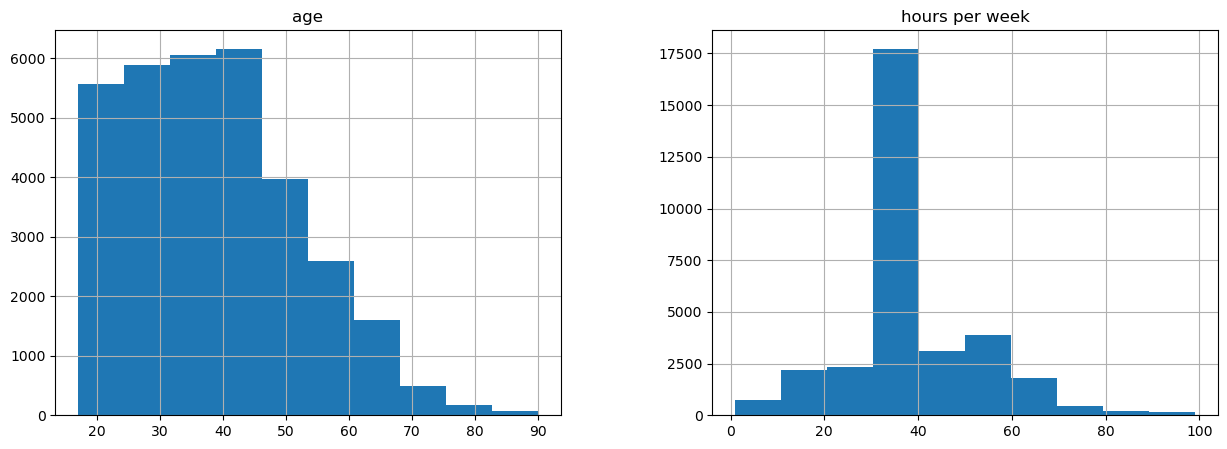

In [11]:
# create list numerical columns as num_cols

num_cols = ['age', 'hours per week']
# Show Histogram using .hist with figsize(15, 5) .hist(figsize=(15, 5))

df[num_cols].hist(figsize=(15,5));



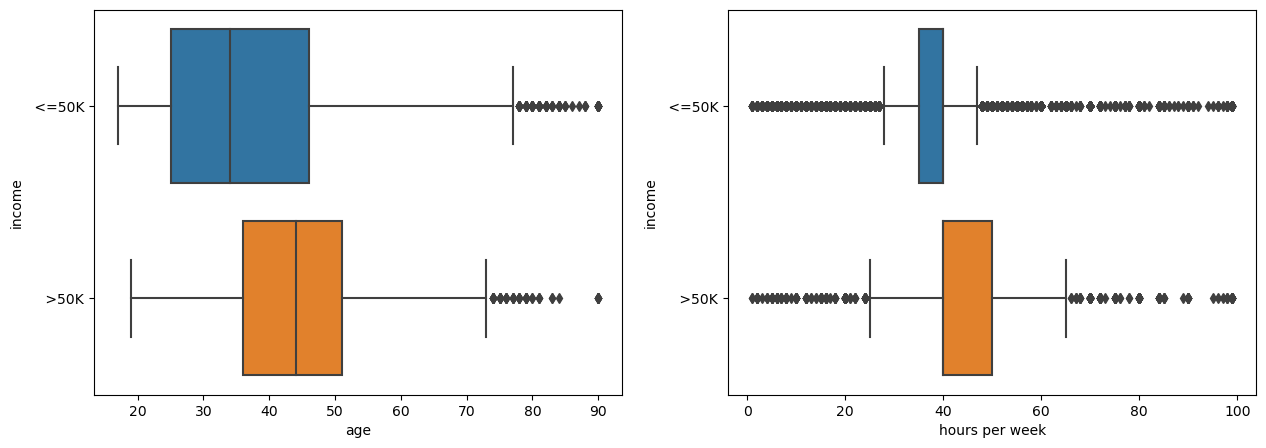

In [13]:
# Create subplot box plot for num_cols
fig, ax = plt.subplots(1, 2, figsize=(15,5))

for ix, col in enumerate(num_cols):
    sns.boxplot(x=col, y='income', data=df, ax=ax[ix]);

In [14]:
# check statistical descriptive 'hours per week' group by 'income'
df.groupby('income')['hours per week'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


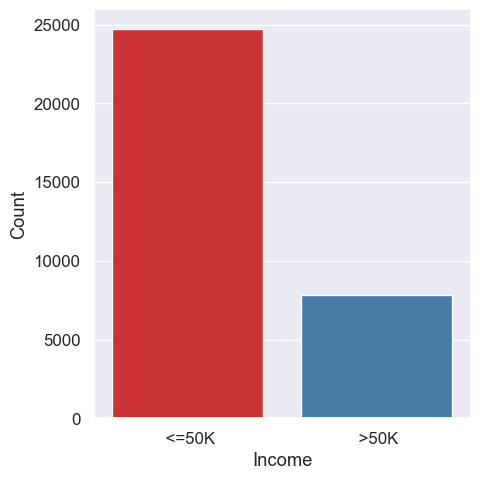

In [23]:
# Plot income proportion

sns.set(style='darkgrid', font_scale = 1.1, palette='Set1')
ax = sns.catplot(x='income', data=df, kind='count', height=5)
plt.xlabel('Income')
plt.ylabel('Count');

`Gender`

In [35]:
# Income categories by gender.
income_by_gender = df.groupby(['gender', 'income']).count()
income_by_gender_percent = income_by_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
income_by_gender_percent_df = income_by_gender_percent.reset_index()
income_by_gender_percent_df = income_by_gender_percent_df.rename(columns={'income': 'count', 'income_1': 'income'})
income_by_gender_percent_df['percentage'] = income_by_gender_percent_df['count'].mul(100).round(2)
# save result as gender_income
gender_income = income_by_gender_percent_df[['gender',  'count', 'percentage']].sort_values('gender')


TypeError: cannot convert the series to <class 'float'>

NameError: name 'gender_income' is not defined

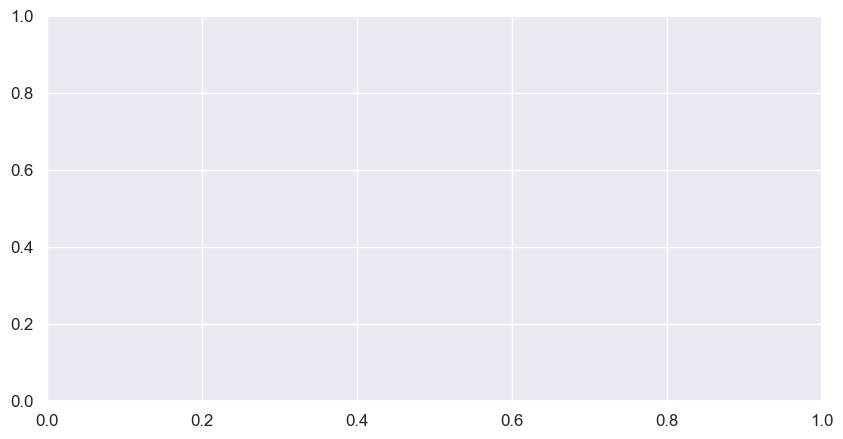

In [33]:
# Plot income vs gender.
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style='darkgrid', font_scale=1, palette='Set1',)
sns.barplot(x='gender', y='percentage', hue='income', data=gender_income)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Income vs. Gender');

`Race`

In [10]:
# Income categories by race.
#                 .value_counts(True)
#                 .rename('percentage')
#                 .mul(100)
#                 .sort_values()
#                 .reset_index())

# save as result as race_income



In [11]:
# Plot income vs race.
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.set(style='darkgrid', font_scale=1, palette='Set1')
# sns.barplot(x='race', y='percentage', hue='income', data=race_income)
# plt.xlabel('Race')
# plt.ylabel('Percentage')
# plt.title('Income vs. Race');

`Age`

In [36]:
# Create age_group column to categorize the range of age.
age_list = [df]

for age in age_list:
    age.loc[age['age'] < 30, 'age_group'] = 20
    age.loc[(age['age'] >= 30) & (age['age'] <= 39), 'age_group'] = 30
    age.loc[(age['age'] >= 40) & (age['age'] <= 49), 'age_group'] = 40
    age.loc[(age['age'] >= 50) & (age['age'] <= 59), 'age_group'] = 50
    age.loc[(age['age'] >= 60) & (age['age'] <= 69), 'age_group'] = 60
    age.loc[(age['age'] >= 70) & (age['age'] <= 79), 'age_group'] = 70
    age.loc[age['age'] >= 80, 'age_group'] = 80

In [38]:
# Change age_group type from float 64 to int64.
df['age_group'] = df['age_group'].astype('int64')
df.head()

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20


In [14]:
# Income categories by age_group.
#                 .value_counts(True)
#                 .rename('percentage')
#                 .mul(100)
#                 .sort_values()
#                 .reset_index())

# Save result as age_income


In [15]:
# Plot income vs age_group.
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.set(style='darkgrid', font_scale=1, palette='Set1')
# sns.barplot(x='age_group', y='percentage', hue='income', data=age_income)
# plt.xlabel('Age Group')
# plt.ylabel('Percentage')
# plt.title('Income vs. Age Group');

`Relationship`

In [16]:
# Income categories by relationship.
# save results as relationship_income


In [17]:
# Plot income vs relationship.
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.set(style='darkgrid', font_scale=1, palette='Set1')
# sns.barplot(x='relationship', y='percentage', hue='income', data=relationship_income)
# plt.xlabel('Relationship')
# plt.ylabel('Percentage')
# plt.title('Income vs. Relationship');

`Occupation`

In [18]:
# Income categories by occupation.
# Save results as occupation_income
# 

In [20]:
# Plot income vs age_group.
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.set(style='darkgrid', font_scale=1, palette='Set1')
# sns.barplot(y='occupation', x='percentage', hue='income', data=occupation_income)
# plt.ylabel('Occupation')
# plt.xlabel('Percentage')
# plt.title('Income vs. Occupation');

`Country`

In [21]:
# Check unique value 'native country'


In [ ]:
# Modify native country column.
# df['native country enc'] = df['native country'].apply(lambda x: 1 if x == ' United-States' else 0)


In [22]:
# Check value_counts 'native country enc'


In [23]:
# sns.countplot(x='native country enc', hue='income', data=df);


In [24]:
# Check income proportion with 'native country enc'] == 1


In [25]:

# plt.figure(figsize=(15, 10))
# sns.countplot(y='native country', hue='income', data=df[df['native country enc'] == 0]);

### **Data Cleaning & Preprocessing**

In [28]:
# The default of keep is 'first'. Thus will only count the first occurrence.
# Check duplicated data 
# df[df.duplicated()].count()


In [27]:
# Set keep = False to find the total row of duplicated data.


In [ ]:
# check 'work' unique value


In [ ]:
# Define X and y.
# X = 'income', 'native country', 'final weight', 'education', 'capital gained', 'capital lost', 'age_group'
# y = 'income


In [29]:
# Split data. 80 train, 20 test, random_state = 42


In [30]:
# X_train.head(3)

**Preprocessing Schemas**

- Missing values (?) ['work', 'occupation] --> Impute with mode.
- Categorical columns: work, marital status, occupation, relationship, race, gender --> onehotencoder
- Numerical columns scaling: age, hours per week --> RobustScaler
- Numerical columns: education num, native country enc --> No preprocessing needed.

In [ ]:
# Prepare column transformers
num_cols         = ['age', 'hours per week']
cat_cols         = ['work', 'marital status', 'occupation', 'relationship', 'race', 'gender']
imputed_cat_cols = ['work', 'occupation']
ignore           = ['education num', 'native country enc']

imputer_mode     = SimpleImputer(missing_values='?', strategy='most_frequent')
ohe              = OneHotEncoder(drop='first')
scaler           = RobustScaler()
ignore_cols      = FunctionTransformer() # Custom transformer that will do nothing.

# Pipeline
imputed_pipeline = Pipeline([
        ('imputer', imputer_mode),
        ('encoder', ohe)
])

transformer = ColumnTransformer([
        ('imputed pipeline', imputed_pipeline, imputed_cat_cols),
        ('encoder', ohe, cat_cols),
        ('ignore', ignore_cols, ignore)
])

transformer_with_scaling = ColumnTransformer([
        ('imputed pipeline', imputed_pipeline, imputed_cat_cols),
        ('encoder', ohe, cat_cols),
        ('scaling', scaler, num_cols),
        ('ignore', ignore_cols, ignore)
])

In [ ]:
# y_train.head()

In [ ]:
# y_test.head()


In [ ]:
# Encode y_train & y_test using ..apply(lambda x: 1 if x == ' >50K' else 0)


### **Model Training**

**Model Pipelines**

In [ ]:
# Prepare training pipeline for each model.
logreg = LogisticRegression(random_state=42, max_iter=1000)
dt     = DecisionTreeClassifier(random_state=42)
knn    = KNeighborsClassifier(n_neighbors = 3)


# Pipeline
logreg_pipeline = Pipeline([
        ('preprocessing', transformer_with_scaling),
        ('logreg', logreg)
])

knn_pipeline = Pipeline([
        ('preprocessing', transformer_with_scaling),
        ('knn', knn)
])
dt_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('dt', dt)
])


In [ ]:
logreg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('imputed pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['work', 'occupation']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['work', 'marital status',
                                                   'occupation', 'relationship',
                                                   'race',

In [31]:
# Train each model pipeline with CV
# print('CV Results\n')
# print('Logistic Regression')
# print('Accuracy', cross_val_score(logreg_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
# print('Recall', cross_val_score(logreg_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
# print('Precision', cross_val_score(logreg_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

# print()
# print('Decision Tree')
# print('Accuracy', cross_val_score(dt_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
# print('Recall', cross_val_score(dt_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
# print('Precision', cross_val_score(dt_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

# print()
# print('KNN')
# print('Accuracy', cross_val_score(dt_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
# print('Recall', cross_val_score(dt_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
# print('Precision', cross_val_score(dt_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

`Interpretation`


In [33]:
# logreg_pipeline.fit(X_train, y_train)
# y_train_pred = logreg_pipeline.predict(X_train)

In [32]:
# Plot confusion matrix.
# log_reg_confusion = confusion_matrix(y_train, y_train_pred)
# ConfusionMatrixDisplay(log_reg_confusion).plot();

In [34]:
# logreg_pipeline.score(X_test, y_test)

In [35]:
# logreg_pipeline.predict(X_test)